# Introduction to DataFrames
**[Bogumił Kamiński](http://bogumilkaminski.pl/about/), May 15, 2021**

In [1]:
using DataFrames

In [2]:
using CategoricalArrays

## Extras - selected functionalities of selected packages

In [3]:
using FreqTables

In [4]:
df = DataFrame(a=rand('a':'d', 1000), b=rand(["x", "y", "z"], 1000))
ft = freqtable(df, :a, :b) # observe that dimensions are sorted if possible

4×3 Named Matrix{Int64}
a ╲ b │  x   y   z
──────┼───────────
'a'   │ 92  89  78
'b'   │ 90  82  83
'c'   │ 86  80  85
'd'   │ 78  86  71

In [5]:
ft[1,1], ft['b', "z"] # you can index the result using numbers or names

(92, 83)

In [6]:
prop(ft, margins=1) # getting proportions - 1 means we want to calculate them in rows (first dimension)

4×3 Named Matrix{Float64}
a ╲ b │        x         y         z
──────┼─────────────────────────────
'a'   │ 0.355212  0.343629  0.301158
'b'   │ 0.352941  0.321569   0.32549
'c'   │ 0.342629  0.318725  0.338645
'd'   │ 0.331915  0.365957  0.302128

In [7]:
prop(ft, margins=2) # and columns are normalized to 1.0 now

4×3 Matrix{Float64}:
 0.265896  0.264095  0.246057
 0.260116  0.243323  0.26183
 0.248555  0.237389  0.268139
 0.225434  0.255193  0.223975

In [8]:
x = categorical(rand(1:3, 10))
levels!(x, [3, 1, 2, 4]) # reordering levels and adding an extra level
freqtable(x) # order is preserved and not-used level is shown

4-element Named Vector{Int64}
Dim1                              │ 
──────────────────────────────────┼──
CategoricalValue{Int64, UInt32} 3 │ 1
CategoricalValue{Int64, UInt32} 1 │ 6
CategoricalValue{Int64, UInt32} 2 │ 3
CategoricalValue{Int64, UInt32} 4 │ 0

In [9]:
freqtable([1,1,2,3,missing]) # by default missings are listed

4-element Named Vector{Int64}
Dim1    │ 
────────┼──
1       │ 2
2       │ 1
3       │ 1
missing │ 1

In [10]:
freqtable([1,1,2,3,missing], skipmissing=true) # but we can skip them

3-element Named Vector{Int64}
Dim1  │ 
──────┼──
1     │ 2
2     │ 1
3     │ 1

In [11]:
df = DataFrame(a=rand(3:4, 1000), b=rand(5:6, 1000))
ft = freqtable(df, :a, :b) # now dimensions are numbers

2×2 Named Matrix{Int64}
a ╲ b │   5    6
──────┼─────────
3     │ 260  254
4     │ 237  249

In [12]:
ft[3,5] # this is an error - standard array indexing takes precedence

LoadError: BoundsError: attempt to access 2×2 Matrix{Int64} at index [3, 5]

In [13]:
ft[Name(3), Name(5)] # you have to use Name() wrapper

260

### DataFramesMeta.jl - working on `DataFrame`

DataFramesMeta.jl provides a more terse syntax due to the benefits of metaprogramming.

In [53]:
using DataFramesMeta

In [15]:
df = DataFrame(x=1:8, y='a':'h', z=repeat([true,false], outer=4))

,x,y,z
,Int64,Char,Bool
1,1,a,1
2,2,b,0
3,3,c,1
4,4,d,0
5,5,e,1
6,6,f,0
7,7,g,1
8,8,h,0


In [16]:
@with(df, :x+:z) # expressions with columns of DataFrame

8-element Vector{Int64}:
 2
 2
 4
 4
 6
 6
 8
 8

In [17]:
@with df begin # you can define code blocks
    a = :x[:z]
    b = :x[.!:z]
    :y + [a; b]
end

8-element Vector{Char}:
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'e': ASCII/Unicode U+0065 (category Ll: Letter, lowercase)
 'h': ASCII/Unicode U+0068 (category Ll: Letter, lowercase)
 'k': ASCII/Unicode U+006B (category Ll: Letter, lowercase)
 'g': ASCII/Unicode U+0067 (category Ll: Letter, lowercase)
 'j': ASCII/Unicode U+006A (category Ll: Letter, lowercase)
 'm': ASCII/Unicode U+006D (category Ll: Letter, lowercase)
 'p': ASCII/Unicode U+0070 (category Ll: Letter, lowercase)

In [18]:
a # @with creates hard scope so variables do not leak out

LoadError: UndefVarError: a not defined

In [19]:
df2 = DataFrame(a = [:a, :b, :c])
@with(df2, :a .== ^(:a)) # sometimes we want to work on a raw Symbol, ^() escapes it

3-element BitVector:
 1
 0
 0

In [20]:
x_str = "x"
y_str = "y"
df2 = DataFrame(x=1:3, y=4:6, z=7:9)
@with(df2, cols(x_str) + cols(y_str)) # cols(expression) selects given columns

3-element Vector{Int64}:
 5
 7
 9

In [21]:
@where(df, :x .< 4, :z .== true) # a very useful macro for filtering

,x,y,z
,Int64,Char,Bool
1,1,a,1
2,3,c,1


In [22]:
@select(df, :x, y = 2*:x, z=:y) # create a new DataFrame based on the old one

,x,y,z
,Int64,Int64,Char
1,1,2,a
2,2,4,b
3,3,6,c
4,4,8,d
5,5,10,e
6,6,12,f
7,7,14,g
8,8,16,h


In [23]:
@transform(df, x = 2*:x, y=:x) # create a new DataFrame adding columns based on the old one

,x,y,z
,Int64,Int64,Bool
1,2,1,1
2,4,2,0
3,6,3,1
4,8,4,0
5,10,5,1
6,12,6,0
7,14,7,1
8,16,8,0


In [24]:
@orderby(df, :z, -:x) # sorting into a new data frame, less powerful than sort, but lightweight

,x,y,z
,Int64,Char,Bool
1,8,h,0
2,6,f,0
3,4,d,0
4,2,b,0
5,7,g,1
6,5,e,1
7,3,c,1
8,1,a,1


In [25]:
@linq df |> # chaining of operations on DataFrame
    where(:x .< 5) |>
    orderby(:z) |>
    transform(x²=:x.^2) |>
    select(:z, :x, :x²)

,z,x,x²
,Bool,Int64,Int64
1,0,2,4
2,0,4,16
3,1,1,1
4,1,3,9


the last one expressed using DataFrames.jl and Pipe.jl would be, so that you can assess the differences in the syntax.

In [26]:
using Pipe

In [27]:
@pipe df |>
    filter(:x => <(5), _) |>
    sort!(_, :z) |>
    transform!(_, :x => (x -> x .^ 2) => :x²) |>
    select!(_, :z, :x, :x²)

,z,x,x²
,Bool,Int64,Int64
1,0,2,4
2,0,4,16
3,1,1,1
4,1,3,9


Note that DataFrames.jl based syntax should be a bit faster as we update the same data frame in-place starting from the `sort!` step.

### DataFramesMeta - working on grouped `DataFrame`

In [28]:
df = DataFrame(a = 1:12, b = repeat('a':'d', outer=3))

,a,b
,Int64,Char
1,1,a
2,2,b
3,3,c
4,4,d
5,5,a
6,6,b
7,7,c
8,8,d
9,9,a


In [29]:
g = groupby(df, :b)

,a,b
,Int64,Char
1,1,a
2,5,a
3,9,a
,a,b
,Int64,Char
1,4,d
2,8,d
3,12,d


In [30]:
using Statistics

In [31]:
@by(df, :b, first=first(:a), last=last(:a), mean=mean(:a)) # groupby+combine in one shot

,b,first,last,mean
,Char,Int64,Int64,Float64
1,a,1,9,5.0
2,b,2,10,6.0
3,c,3,11,7.0
4,d,4,12,8.0


In [32]:
@combine(g, first=first(:a), last=last(:a), mean=mean(:a)) # the same as by but on grouped DataFrame

,b,first,last,mean
,Char,Int64,Int64,Float64
1,a,1,9,5.0
2,b,2,10,6.0
3,c,3,11,7.0
4,d,4,12,8.0


In [33]:
combine(g, :a .=> [first, last, mean]) # similar in DataFrames.jl - we use auto-generated column names

,b,a_first,a_last,a_mean
,Char,Int64,Int64,Float64
1,a,1,9,5.0
2,b,2,10,6.0
3,c,3,11,7.0
4,d,4,12,8.0


In [34]:
@where(g, mean(:a) > 6.5) # filter gropus on aggregate conditions

,a,b
,Int64,Char
1,3,c
2,4,d
3,7,c
4,8,d
5,11,c
6,12,d


In [35]:
# perform operations within a group and return ungrouped DataFrame
@transform(g, center = mean(:a), centered = :a .- mean(:a))

,a,b,center,centered
,Int64,Char,Float64,Float64
1,1,a,5.0,-4.0
2,2,b,6.0,-4.0
3,3,c,7.0,-4.0
4,4,d,8.0,-4.0
5,5,a,5.0,0.0
6,6,b,6.0,0.0
7,7,c,7.0,0.0
8,8,d,8.0,0.0
9,9,a,5.0,4.0


In [36]:
DataFrame(g) # this is defined in DataFrames.jl

,a,b
,Int64,Char
1,1,a
2,5,a
3,9,a
4,2,b
5,6,b
6,10,b
7,3,c
8,7,c
9,11,c


In [37]:
@transform(g) # actually this is not the same as DataFrame() as it perserves the original row order

,a,b
,Int64,Char
1,1,a
2,2,b
3,3,c
4,4,d
5,5,a
6,6,b
7,7,c
8,8,d
9,9,a


In [38]:
@linq df |>
    groupby(:b) |>
    where(mean(:a) > 6.5) |>
    DataFrame # you can do chaining on grouped DataFrames as well

,a,b
,Int64,Char
1,3,c
2,4,d
3,7,c
4,8,d
5,11,c
6,12,d


The same operations using DataFrames.jl and Pipe.jl would be (note that DataFrames.jl by default puts the grouping column first)

In [39]:
@pipe df |>
    groupby(_, :b) |>
    combine(sdf -> mean(sdf.a) > 6.5 ? sdf : DataFrame(), _)

,b,a
,Char,Int64
1,c,3
2,c,7
3,c,11
4,d,4
5,d,8
6,d,12


### DataFramesMeta - rowwise operations on `DataFrame`

In [40]:
df = DataFrame(a = 1:12, b = repeat(1:4, outer=3))

,a,b
,Int64,Int64
1,1,1
2,2,2
3,3,3
4,4,4
5,5,1
6,6,2
7,7,3
8,8,4
9,9,1


In [41]:
# such conditions are often needed but are complex to write
@transform(df, x = ifelse.((:a .> 6) .& (:b .== 4), "yes", "no"))

,a,b,x
,Int64,Int64,String
1,1,1,no
2,2,2,no
3,3,3,no
4,4,4,no
5,5,1,no
6,6,2,no
7,7,3,no
8,8,4,yes
9,9,1,no


In [42]:
# one option is to use a function that works on a single observation and broadcast it
myfun(a, b) = a > 6 && b == 4 ? "yes" : "no"
@transform(df, x = myfun.(:a, :b))

,a,b,x
,Int64,Int64,String
1,1,1,no
2,2,2,no
3,3,3,no
4,4,4,no
5,5,1,no
6,6,2,no
7,7,3,no
8,8,4,yes
9,9,1,no


In [43]:
# or you can use @byrow! macro that allows you to process DataFrame rowwise
@eachrow df begin
   @newcol x::Vector{String}
    :x = :a > 6 && :b == 4 ? "yes" : "no"
end

,a,b,x
,Int64,Int64,String
1,1,1,no
2,2,2,no
3,3,3,no
4,4,4,no
5,5,1,no
6,6,2,no
7,7,3,no
8,8,4,yes
9,9,1,no


In DataFramses.jl you would write this as:

In [44]:
transform(df, [:a, :b] => ByRow((a,b) -> ifelse(a > 6 && b == 4, "yes", "no")) => :x)

,a,b,x
,Int64,Int64,String
1,1,1,no
2,2,2,no
3,3,3,no
4,4,4,no
5,5,1,no
6,6,2,no
7,7,3,no
8,8,4,yes
9,9,1,no


You can also use `eachrow` from DataFrames to perform the same transformation. However `@eachrow` will be faster than the operation below. 

In [45]:
df2 = copy(df)
df2.x = Vector{String}(undef, nrow(df2))
for row in eachrow(df2)
   row[:x] = row[:a] > 6 && row[:b] == 4 ? "yes" : "no"
end
df2

,a,b,x
,Int64,Int64,String
1,1,1,no
2,2,2,no
3,3,3,no
4,4,4,no
5,5,1,no
6,6,2,no
7,7,3,no
8,8,4,yes
9,9,1,no


### Visualizing data with StatsPlots

In [46]:
using StatsPlots # you might need to setup Plots package and some plotting backend first
default(fmt=:png)

we present only a minimal functionality of the package

In [47]:
using Random
Random.seed!(1)
df = DataFrame(x = sort(randn(1000)), y=randn(1000), z = [fill("b", 500); fill("a", 500)]);

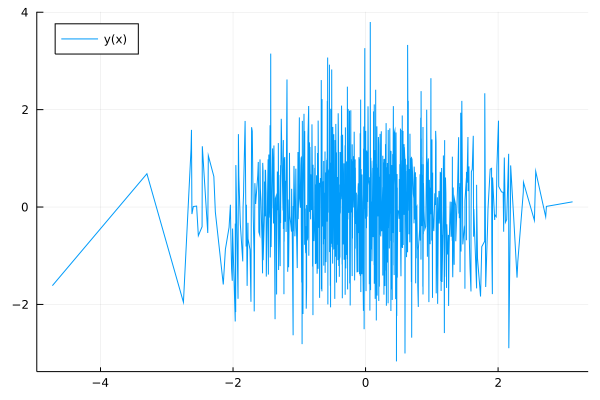

In [48]:
@df df plot(:x, :y, legend=:topleft, label="y(x)") # a most basic plot

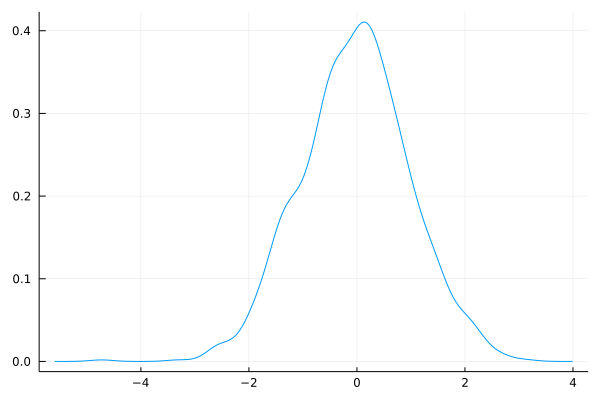

In [49]:
@df df density(:x, label="") # density plot

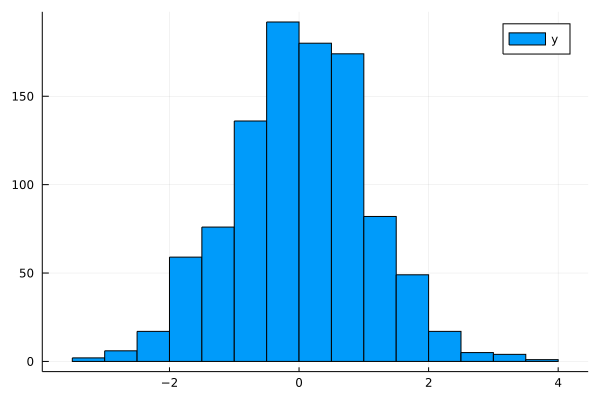

In [50]:
@df df histogram(:y, label="y") # and a histogram

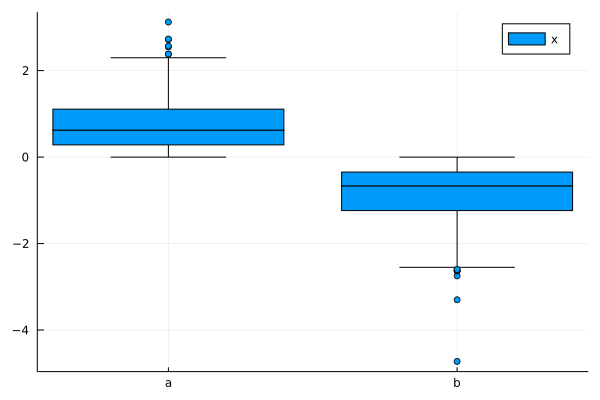

In [51]:
@df df boxplot(:z, :x, label="x")

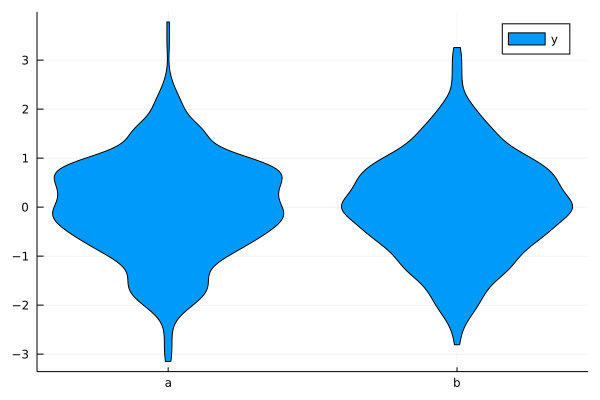

In [52]:
@df df violin(:z, :y, label="y") 